In [2]:
import numpy as np
import astropy
import healpy as hp
import pandas as pd
from desiutil.plots import plot_sky_binned
from desitarget.geomask import imaging_mask


Verfying different methods of extracting galaxies: Colour cuts vs Random Forests

In [165]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample_profiling.csv')
df.head()

,BrickID,RA,DEC,LRG,ELG,QSO,Fitbits,Maskbits
0,120312.0,5.163878,-39.413440,0.0,0.0,0.0,2049.0,2.0
1,120312.0,5.163943,-39.441502,0.0,0.0,0.0,1.0,0.0
2,120312.0,5.164127,-39.416114,0.0,0.0,0.0,2049.0,130.0
3,120312.0,5.164128,-39.442283,0.0,0.0,0.0,1.0,0.0
4,120312.0,5.164330,-39.430608,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape
df_test = df[(df['LRG'] !=0) | (df['ELG'] !=0) | (df['QSO'] !=0)]
df_test = df_test[(df_test['LRG'] != 0)]

In [ ]:
df = df.astype(int)

In [103]:
df['SUM'] = df.sum(axis=1)
df = df[df['SUM'] != 0]
df.describe()

,LRG,ELG,ELGVLO,QSO,QSO_RF,SUM
count,407262.000000,407262.000000,407262.000000,407262.000000,407262.000000,407262.000000
mean,0.100871,0.150041,0.608846,1.437298,0.790511,6.175135
std,0.301158,0.526849,0.920327,1.498691,1.321601,3.302047
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,0.000000,0.000000,2.000000,3.000000,3.000000,6.000000
max,1.000000,2.000000,2.000000,3.000000,3.000000,18.000000


In [104]:
print(df.shape)
df = df[df['SUM'] != 0]
df.shape
df.describe()

(407262, 6)


,LRG,ELG,ELGVLO,QSO,QSO_RF,SUM
count,407262.000000,407262.000000,407262.000000,407262.000000,407262.000000,407262.000000
mean,0.100871,0.150041,0.608846,1.437298,0.790511,6.175135
std,0.301158,0.526849,0.920327,1.498691,1.321601,3.302047
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,0.000000,0.000000,2.000000,3.000000,3.000000,6.000000
max,1.000000,2.000000,2.000000,3.000000,3.000000,18.000000


In [123]:
df_test = df[(df['ELG'] !=0) | (df['ELGVLO'] !=0)]
df_test = df_test[(df_test['QSO'] != 0)]

print(df_test.shape)
df_test.head()

(16819, 6)


,LRG,ELG,ELGVLO,QSO,QSO_RF,SUM
89,0,0,2,3,3,16
107,0,0,2,3,3,16
118,0,2,0,3,3,16
515,0,0,2,3,3,16
819,0,2,0,3,0,10


In [11]:
df_test.describe()

,LRG,ELG,QSO,QSO_RF,SUM
count,458.000000,458.0,458.000000,458.0,458.000000
mean,0.004367,2.0,1.329694,3.0,6.334061
std,0.066010,0.0,1.491930,0.0,1.498277
min,0.000000,2.0,0.000000,3.0,5.000000
25%,0.000000,2.0,0.000000,3.0,5.000000
50%,0.000000,2.0,0.000000,3.0,5.000000
75%,0.000000,2.0,3.000000,3.0,8.000000
max,1.000000,2.0,3.000000,3.0,9.000000


In [ ]:

df.head()


Veryfing Maskbits extraction worked accordingly

In [183]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample_profiling.csv')

df.columns = ['BrickID', 'RA', 'DEC', 'LRG','ELG','QSO', 'Fitbits', 'Maskbits']
df = df.astype({'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8','QSO': 'int8','Fitbits': 'int16', 'Maskbits': 'int16'})
print(len(df.BrickID.unique()))

14


In [184]:
print(df.shape)
duplicates_removed = df.drop_duplicates()

print(duplicates_removed.shape)
df = duplicates_removed

(5136, 8)
(5136, 8)


In [185]:
df.head()

,BrickID,RA,DEC,LRG,ELG,QSO,Fitbits,Maskbits
0,120312,5.165116,-39.411469,0,1,0,1,0
1,120312,5.165771,-39.443575,0,0,1,1,0
2,120312,5.167412,-39.552630,0,1,0,1,0
3,120312,5.169102,-39.400914,0,0,1,1,0
4,120312,5.169548,-39.533226,0,0,1,1,0


In [186]:
print(len(df))
m = imaging_mask(df.Maskbits)
print(len(m) - m.sum())
print(round((len(m) - m.sum())/len(df),3))

5136
372
0.072


In [2]:
import os
from brick import Brick
from astropy.io import fits
for filename in os.listdir('/Volumes/Astrodisk/bricks_data/south/'):
    brickn = filename.replace("tractor-", "")
    brickname = brickn.replace(".fits", "")

hdu = fits.open(f'/Volumes/Astrodisk/bricks_data/south/tractor-{brickname}.fits')
data = hdu[1].data
brick = Brick(data)
brick.initialise_brick_for_galaxy_classification(True)
target_objects = brick.classify_galaxies()
df_test = pd.DataFrame(target_objects,
                              columns=['BrickID', 'RA', 'DEC', 'LRG', 'ELG', 'QSO',  'Maskbits'])

df_test = df_test.astype({'BrickID': 'int32', 'LRG': 'int8', 'ELG': 'int8','QSO': 'int8', 'Maskbits': 'int16'})

df_test.head()

,BrickID,RA,DEC,LRG,ELG,QSO,Maskbits
0,55028,38.794663,-56.563886,0,0,1,2049
1,55028,38.796776,-56.398739,0,0,1,1
2,55028,38.797024,-56.439648,0,0,1,1
3,55028,38.799300,-56.490481,0,0,1,0
4,55028,38.800274,-56.611738,0,0,1,0


In [3]:
df_test = pd.read_csv('../bricks_data/galaxy_catalogue_north.csv')
m = imaging_mask(df_test.Maskbits)
print(len(m) - m.sum())
print(round((len(m) - m.sum())/len(df_test),3))
print(len(df_test))
m = np.invert(m)
df_test = df_test[m]
print(len(df_test))
df_test.head(15)

0
0.0
65926
0


,BrickID,RA,DEC,LRG,ELG,QSO,Maskbits


In [ ]:
# Setting NSIDE values
NSIDE = 59
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


print(1/(hp.nside2resol(NSIDE, arcmin=True) / 60)**2)

In [71]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))



### Density Estimate for LRG

Number of LRGs in Sample: 4271038
284973
Mean LRGs per Pixel: 14.987518115751318


0.0 180.0 -180.0 180.0


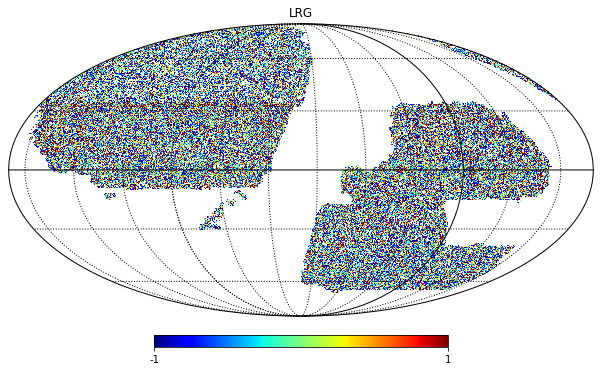

In [17]:
df_LRG = df[df["Target_type"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

m_LRG = np.zeros(NPIX)
LRG_pixel_indices = hp.ang2pix(NSIDE, theta,phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(len(unique))
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block
density_LRG = (counts / mean_LRG) - 1

m_LRG[unique] = density_LRG
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



### Density Estimate for ELG


Number of ELG in Sample: 14963034
Mean ELG per Pixel: 49.39322037255271


0.0 180.0 -180.0 180.0


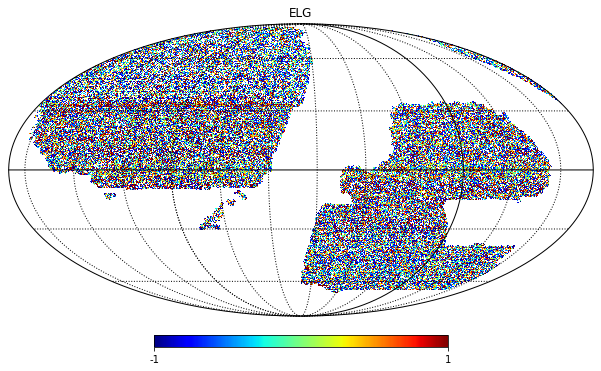

In [18]:

df_ELG = df[df["Target_type"] == 2]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)


print("Number of ELG in Sample:", len(ra_ELG))

m_ELG = np.zeros(NPIX)
ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
# Future: Dont take unique, but also count zero pixels
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

mean_ELG = counts.mean()
print("Mean ELG per Pixel:", mean_ELG)

# Calculating Densities for every block
density_ELG = (counts / mean_ELG) - 1

m_ELG[unique] = density_ELG
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()




### Density Estimate for QSO


Number of QSO in Sample: 20596063


0.0 180.0 -180.0 180.0


Mean QSO per Pixel: 993.3473039452108


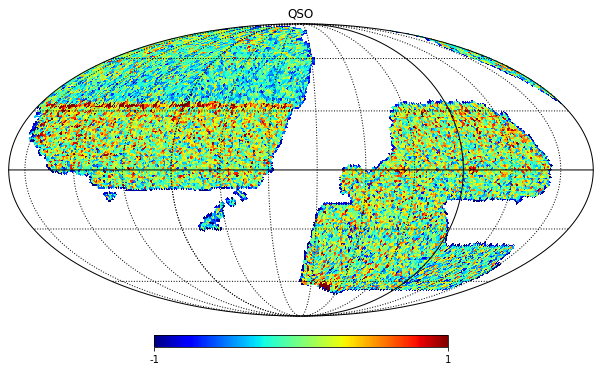

In [93]:

df_QSO = df[df["Target_type"] == 3]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)


print("Number of QSO in Sample:", len(ra_QSO))

m_QSO = np.zeros(NPIX)
QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

mean_QSO = counts.mean()
print("Mean QSO per Pixel:", mean_QSO)

# Calculating Densities for every block
density_QSO = (counts / mean_QSO) - 1

m_QSO[unique] = density_QSO

mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
ax = plot_sky_binned(ra_QSO, dec_QSO, plot_type='healpix', max_bin_area=0.25, verbose=True, cmap='jet')
